In [186]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

In [187]:
stock = 'MSFT.NE'
data = yf.download(stock,'2010-01-01','2023-05-14')
data.head()


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-10-05,22.010000,22.180000,22.010000,22.100000,21.790449,6640
2021-10-06,21.879999,22.430000,21.879999,22.280001,21.967930,6360
2021-10-07,22.590000,22.680000,22.559999,22.559999,22.244005,16500
2021-10-08,22.650000,22.670000,22.480000,22.540001,22.224289,17173
2021-10-12,22.620001,22.620001,22.400000,22.410000,22.096107,9704


In [188]:
price = data['Close']
price

Date
2021-10-05    22.100000
2021-10-06    22.280001
2021-10-07    22.559999
2021-10-08    22.540001
2021-10-12    22.410000
                ...    
2023-05-08    23.030001
2023-05-09    22.900000
2023-05-10    23.309999
2023-05-11    23.150000
2023-05-12    23.059999
Name: Close, Length: 402, dtype: float64

<Axes: xlabel='Date'>

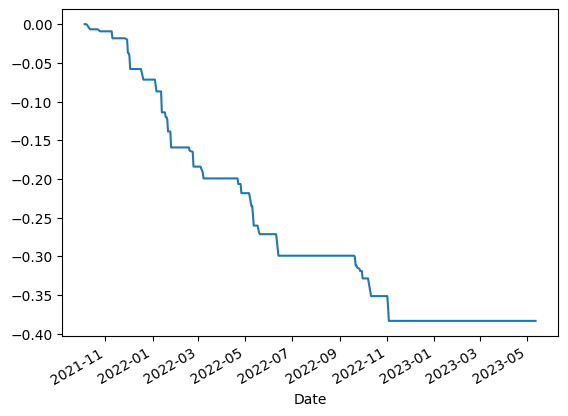

In [189]:
roll_max = data['Close'].rolling(len(price)-1,min_periods=1).max()
daily_drawdown = data['Close']/roll_max - 1.0
mdd = daily_drawdown.rolling(len(price)-1,min_periods=1).min()
mdd.plot()


In [190]:
print(f"Maximum Drawdown is: {mdd[-1]*100} %")

Maximum Drawdown is: -38.35302951394822 %


In [191]:
returns = data['Close'].resample('D').ffill().pct_change().to_numpy()
returns[0] = 0
returns

array([ 0.        ,  0.00814481,  0.01256727, -0.00088646,  0.        ,
        0.        ,  0.        , -0.00576757,  0.01204821,  0.021164  ,
        0.00172716,  0.        ,  0.        ,  0.01206891,  0.00212952,
       -0.00254999,  0.01150407, -0.00379108,  0.        ,  0.        ,
       -0.00549679,  0.00807817,  0.04386339,  0.00202017,  0.02177423,
        0.        ,  0.        , -0.0086819 ,  0.01393306,  0.00274839,
        0.00587313,  0.00077846,  0.        ,  0.        ,  0.00233378,
       -0.00310438, -0.01518105,  0.00395258,  0.01377954,  0.        ,
        0.        , -0.00271843,  0.0112928 , -0.00115513,  0.00462602,
        0.00652341,  0.        ,  0.        , -0.00800607, -0.00883934,
        0.00193871,  0.01006193, -0.01226052,  0.        ,  0.        ,
       -0.00271535, -0.01750287, -0.00039589, -0.00396041, -0.01749505,
        0.        ,  0.        ,  0.00930803,  0.02405775,  0.00156613,
       -0.0046912 ,  0.02867249,  0.        ,  0.        , -0.00

In [192]:
cumulative_ret =( 1+returns).cumprod()
cumulative_ret

array([1.        , 1.00814481, 1.02081444, 1.01990953, 1.01990953,
       1.01990953, 1.01990953, 1.01402712, 1.02624434, 1.04796378,
       1.04977377, 1.04977377, 1.04977377, 1.0624434 , 1.0647059 ,
       1.0619909 , 1.07420812, 1.07013571, 1.07013571, 1.07013571,
       1.0642534 , 1.07285062, 1.11990948, 1.12217189, 1.14660632,
       1.14660632, 1.14660632, 1.1366516 , 1.15248864, 1.15565613,
       1.16244344, 1.16334835, 1.16334835, 1.16334835, 1.16606335,
       1.16244344, 1.14479633, 1.14932123, 1.16515835, 1.16515835,
       1.16515835, 1.16199094, 1.17511307, 1.17375566, 1.17918548,
       1.18687779, 1.18687779, 1.18687779, 1.17737557, 1.16696835,
       1.16923076, 1.18099547, 1.16651585, 1.16651585, 1.16651585,
       1.16334835, 1.14298642, 1.14253392, 1.13800901, 1.11809949,
       1.11809949, 1.11809949, 1.12850679, 1.15565613, 1.15746604,
       1.15203614, 1.18506788, 1.18506788, 1.18506788, 1.17420816,
       1.13393661, 1.1266968 , 1.12488689, 1.11990948, 1.11990

In [198]:
print(f"Cumulative return is {cumulative_ret[-1]*100}%")

Cumulative return is 104.3438871850772%


In [199]:
yearly_returns = data['Close'].resample('Y').ffill().pct_change()
yearly_returns

Date
2021-12-31         NaN
2022-12-31   -0.299182
2023-12-31    0.281823
Freq: A-DEC, Name: Close, dtype: float64

In [200]:
monthly_returns = data['Close'].resample('M').ffill().pct_change()
monthly_returns

Date
2021-10-31         NaN
2021-11-30   -0.003157
2021-12-31    0.016231
2022-01-31   -0.075185
2022-02-28   -0.040859
2022-03-31    0.034256
2022-04-30   -0.106582
2022-05-31   -0.017110
2022-06-30   -0.062863
2022-07-31    0.093911
2022-08-31   -0.033019
2022-09-30   -0.140976
2022-10-31   -0.006246
2022-11-30    0.090857
2022-12-31   -0.057622
2023-01-31    0.031128
2023-02-28    0.007547
2023-03-31    0.154628
2023-04-30    0.062558
2023-05-31    0.005669
Freq: M, Name: Close, dtype: float64

In [201]:
avg_yearly_return = yearly_returns.mean()
print(f"Average yearly return is : {avg_yearly_return*100}%")

Average yearly return is : -0.8679356836033603%


In [202]:
sharpe_ratio = (avg_yearly_return - 0.05)/(monthly_returns.std())
print(f"Sharpe ratio is : {sharpe_ratio*10}")

Sharpe ratio is : -8.096923887259473


In [203]:
neg_monthly_returns = monthly_returns[monthly_returns < 0]
neg_monthly_returns

Date
2021-11-30   -0.003157
2022-01-31   -0.075185
2022-02-28   -0.040859
2022-04-30   -0.106582
2022-05-31   -0.017110
2022-06-30   -0.062863
2022-08-31   -0.033019
2022-09-30   -0.140976
2022-10-31   -0.006246
2022-12-31   -0.057622
Name: Close, dtype: float64

In [204]:
std_neg = neg_monthly_returns.std()
sortino = ((avg_yearly_return - 0.05)*10.0)/std_neg
print(f"Sortino Ratio: {sortino}")

Sortino Ratio: -13.22888573405499
